In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot

In [2]:
df = pd.read_csv('preprocess_data.csv')

In [3]:
df['month'].unique()

array(['Oct', 'Dec', 'Aug', 'Jul', 'Feb', '3 (', 'Nov', 'Sep', 'May',
       'Mar', 'Jan', 'Jun', 'Apr', '9 (', '2 (', '0 (', '1 (', '5 (',
       '6 (', '4 (', '8 (', '7 ('], dtype=object)

In [4]:
df2 = df[df['month'].isin(['Oct', 'Dec', 'Aug','Jul', 'Feb', 'Nov', 'Sep', 'May',
       'Mar', 'Jan', 'Jun', 'Apr'])]

In [6]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12, }
df2.month = df2.month.map(d)

C:\Users\aion_\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df2['month']

0        10
1        12
2         8
3         7
4         2
         ..
71467     9
71468     7
71469     9
71470     8
71471    11
Name: month, Length: 68730, dtype: int64

In [10]:
df2.to_csv('veri_clean_with_month.csv', index=False)

In [11]:
df= df[pd.to_numeric(df['rating'], errors='coerce').notnull()]

<AxesSubplot:title={'center':'rating'}, xlabel='kind'>

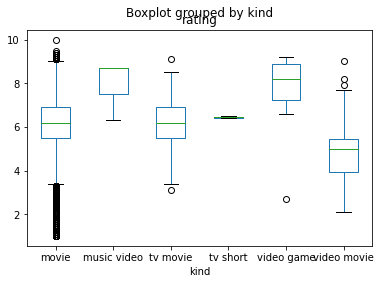

In [12]:
df.boxplot(by='kind',column =['rating'], grid = False)

<AxesSubplot:title={'center':'rating'}, xlabel='color_info'>

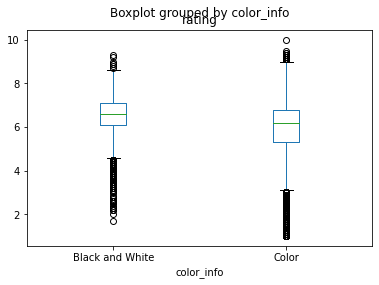

In [13]:
df.boxplot(by='color_info',column =['rating'], grid = False)

<AxesSubplot:title={'center':'rating'}, xlabel='sound_mix'>

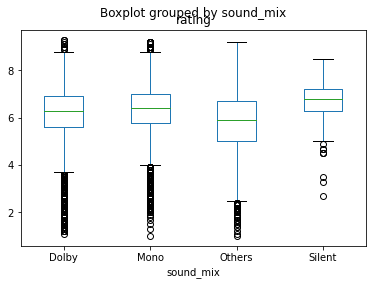

In [14]:
df.boxplot(by='sound_mix',column =['rating'], grid = False)

<AxesSubplot:title={'center':'runtime'}, xlabel='kind'>

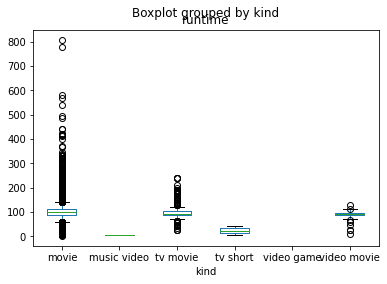

In [17]:
df.boxplot(by='kind',column =['runtime'], grid = False)

<AxesSubplot:title={'center':'runtime'}, xlabel='color_info'>

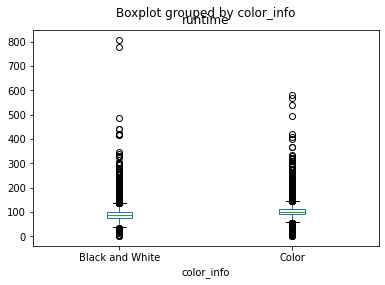

In [18]:
df.boxplot(by='color_info',column =['runtime'], grid = False)

<AxesSubplot:title={'center':'runtime'}, xlabel='sound_mix'>

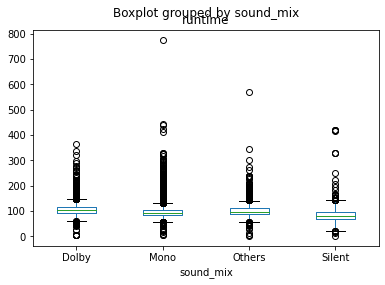

In [19]:
df.boxplot(by='sound_mix',column =['runtime'], grid = False)

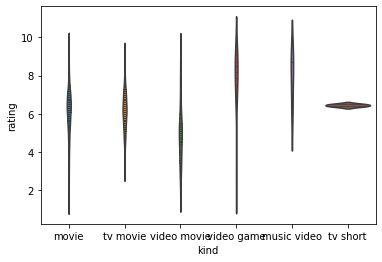

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x='kind', y='rating',data=df,inner='stick')
plt.show()

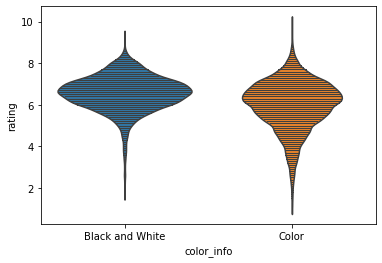

In [16]:
sns.violinplot(x='color_info', y='rating',data=df,inner='stick')
plt.show()

In [ ]:
country_list = df['country'].value_counts()[0:20].index
country_list

Index(['USA', 'France', 'India', 'UK', 'Italy', 'Japan', 'Canada', 'Vietnam',
       'Germany', 'Spain', 'Australia', 'Hong Kong', 'Sweden', 'South Korea',
       'Turkey', 'Belgium', 'West Germany', 'Brazil', 'Denmark',
       'Netherlands'],
      dtype='object')

In [ ]:
df['country'] = df.country.apply(lambda s: s if s in country_list else 'Others')

In [ ]:
df['country']

0              USA
1        Australia
2          Germany
3           Canada
4           France
           ...    
71467    Australia
71468          USA
71469       Others
71470          USA
71471       Others
Name: country, Length: 71472, dtype: object

In [ ]:
df['country'].value_counts()

USA             16345
Others          15327
France           5343
India            3732
UK               3695
Italy            3640
Japan            3248
Canada           2803
Vietnam          2388
Germany          1868
Spain            1448
Australia        1422
Hong Kong        1349
Sweden           1317
South Korea      1274
Turkey           1148
Belgium          1144
West Germany     1085
Brazil           1036
Denmark           989
Netherlands       871
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

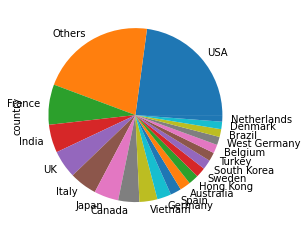

In [ ]:
df.country.value_counts().plot(kind='pie')

In [ ]:
df['rating'] = df['rating'].astype(float)
df['runtime'] = df['runtime'].astype(float)
# df['rating'] = df['rating'].astype(float)



In [ ]:
df[(df["runtime"] > 400) & (df["kind"] == 'movie')] 

,title,year,rating,runtime,kind,color_info,sound_mix,director_name,genre,director_id,cast_names,cast_ids,votes,country,day,month
53,Les vampires,1915.0,7.3,421.0,movie,Black and White,Silent,Louis Feuillade,"['Action', 'Adventure', 'Crime', 'Drama', 'Mys...",275421.0,"[['Musidora', 'Édouard Mathé', 'Marcel Lévesqu...","[['0615736', '0559013', '0529695', '0043923', ...",4612.0,France,13,Nov
123,Tih Minh,1918.0,7.1,418.0,movie,Black and White,Silent,Louis Feuillade,"['Adventure', 'Mystery']",275421.0,"[['Mary Harald', 'René Cresté', 'Georges Bisco...","[['0361787', '0187612', '0083925', '0559013', ...",351.0,France,7,Feb
300,The Wheel,1923.0,7.5,417.0,movie,Black and White,Silent,Abel Gance,['Drama'],304098.0,"[['Gabriel de Gravone', 'Pierre Magnier', 'Geo...","[['0336414', '0536252', '0879412', '0786313', ...",2206.0,France,17,Feb
8013,Les vampires,1915.0,7.3,421.0,movie,Black and White,Silent,Louis Feuillade,"['Action', 'Adventure', 'Crime', 'Drama', 'Mys...",275421.0,"[['Musidora', 'Édouard Mathé', 'Marcel Lévesqu...","[['0615736', '0559013', '0529695', '0043923', ...",4613.0,France,13,Nov
12301,War and Peace,1965.0,8.3,422.0,movie,Color,Mono,Sergey Bondarchuk,"['Drama', 'History', 'Romance', 'War']",94083.0,"[['Sergey Bondarchuk', 'Lyudmila Saveleva', 'V...","[['0094083', '0767567', '0863146', '0952294', ...",6925.0,Others,14,Mar
15857,Hitler: A Film from Germany,1977.0,7.5,442.0,movie,Black and White,Mono,Hans-Jürgen Syberberg,"['Biography', 'Drama']",842944.0,"[['Heinz Schubert', 'Peter Kern', 'Hellmut Lan...","[['0775799', '0449489', '0486132', '0901901', ...",819.0,France,7,Jun
19521,The Satin Slipper,1985.0,6.8,410.0,movie,Color,Mono,Manoel de Oliveira,['Drama'],210701.0,"[['Luís Miguel Cintra', 'Patricia Barzyk', 'An...","[['0162502', '0059564', '0175931', '0310331', ...",176.0,France,8,Jan
24720,Satantango,1994.0,8.4,439.0,movie,Black and White,Mono,Béla Tarr,['Drama'],850601.0,"[['Mihály Vig', 'Putyi Horváth', 'László feLug...","[['0896902', '0395814', '0269841', '0022034', ...",10370.0,Others,28,Apr
32351,Out 1,1971.0,7.7,776.0,movie,Black and White,Mono,"Jacques Rivette_>, <Person id:0771535[http] na...","['Drama', 'Mystery']",729626.0,"[['Michèle Moretti', 'Hermine Karagheuz', 'Kar...","[['0604331', '0438751', '0969979', '0047623', ...",1316.0,France,18,Nov
33288,Khleb - imya sushchestvitelnoe,1988.0,5.9,580.0,movie,Color,NaN,Grigori Nikulin,"['Drama', 'History', 'Romance', 'War']",631987.0,"[['Nikolai Voloshin', 'Andrey Dudarenko', 'Ser...","[['1111892', '0240019', '0631963', '0750850', ...",162.0,Others,6,Oct


In [ ]:
df['kind'].value_counts()

movie          70990
tv movie         395
video movie       67
video game        15
music video        3
tv short           2
Name: kind, dtype: int64

Kiểm tra runtime các movie có thời lượng < 100', chủ yếu là tầm 100'

In [ ]:
df_runtime = df[(df["runtime"] < 250) & (df["kind"] == 'movie')] 
# df_runtime

<AxesSubplot:ylabel='Frequency'>

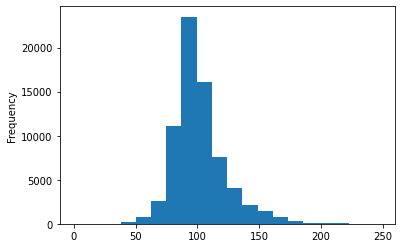

In [ ]:
df_runtime.runtime.plot.hist(bins = 20)

Kiểm tra runtime các tv series có thời lượng < 100', chủ yếu là tầm 100'

<AxesSubplot:ylabel='Frequency'>

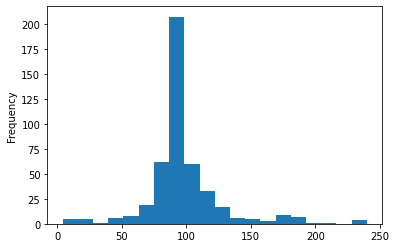

In [ ]:
df_tv = df[(df["runtime"] < 250) & (df["kind"] != 'movie')] 
df_tv.runtime.plot.hist(bins = 20)

Có một vài movie có runtime lớn hơn 300'

<AxesSubplot:ylabel='Frequency'>

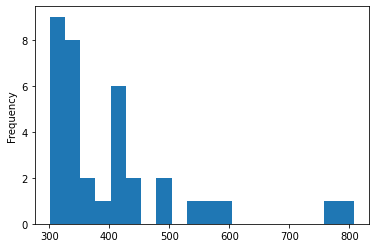

In [ ]:
df_tv = df[(df["runtime"] > 300) & (df["kind"] == 'movie')] 
df_tv.runtime.plot.hist(bins = 20)

<AxesSubplot:xlabel='runtime', ylabel='rating'>

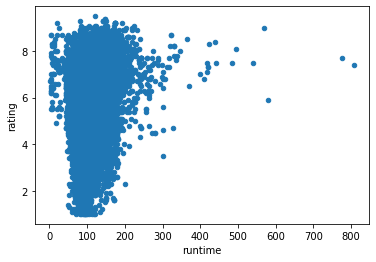

In [ ]:
df.plot.scatter(x='runtime', y='rating')

Chỉ lấy movie có runtime < 250' <br>
Có thể thấy movie có thời lượng < 50 hoặc > 200 thì thường rating sẽ cao hơn

<AxesSubplot:xlabel='runtime', ylabel='rating'>

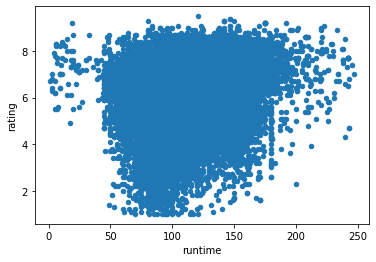

In [ ]:
df_runtime.plot.scatter(x='runtime', y='rating')

Lấy tv series có runtime > 250

<AxesSubplot:xlabel='runtime', ylabel='rating'>

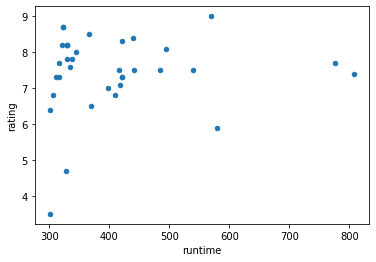

In [ ]:
df_tv.plot.scatter(x='runtime', y='rating')

Kiểm tra rating qua các năm

In [ ]:
year_rating = df[['year', 'rating']]
year_rating = year_rating[pd.to_numeric(year_rating['year'], errors='coerce').notnull()]
# year_rating['year'] = pd.DatetimeIndex(year_rating['year']).year

# year_rating['year'] = year_rating['year'].astype(float)
year_rating


,year,rating
0,1894.0,5.9
1,1906.0,6.1
2,1911.0,5.9
3,1963.0,7.0
4,1994.0,7.1
...,...,...
71467,2019.0,4.8
71468,2017.0,6.2
71469,2018.0,8.4
71470,2020.0,4.6


In [ ]:
year_rating['year'].value_counts()

2018.0    2924
2017.0    2894
2016.0    2681
2019.0    2623
2015.0    2493
          ... 
1911.0       2
1895.0       1
1894.0       1
1906.0       1
1902.0       1
Name: year, Length: 115, dtype: int64

In [ ]:
plot_year_rating = year_rating.groupby(['year']).mean().reset_index()
plot_year_rating['year'] = plot_year_rating['year'].astype(int)
plot_year_rating['year'] = plot_year_rating.year.apply(lambda s: s//10*10)

Chia thành từng thập kỉ, thấy rating có vẻ đồng đều

<AxesSubplot:ylabel='year'>

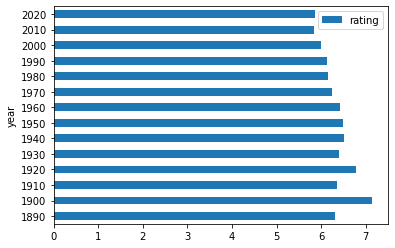

In [ ]:
real_plot_year_rating = plot_year_rating.groupby(['year']).mean().reset_index()
real_plot_year_rating.plot.barh(x='year',y='rating',rot=0)


Kiểm tra tương quan lượng phim đen trắng và phim màu

<AxesSubplot:ylabel='color_info'>

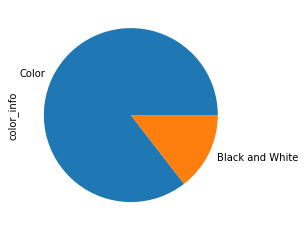

In [ ]:
df.color_info.value_counts().plot(kind='pie')

Rating của phim đen trắng nhỉnh hơn một chút

<AxesSubplot:xlabel='color_info'>

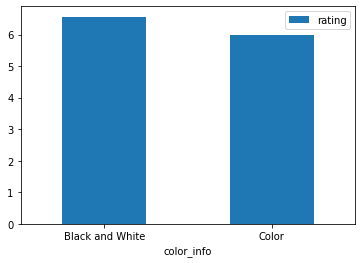

In [ ]:
rating_color = df[['rating', 'color_info']]
mean_color = rating_color.groupby(['color_info']).mean().reset_index()
mean_color.plot.bar(x='color_info',y='rating',rot=0)

Kiểm tra số lượng phim đen trắng và phim màu qua từng năm, xem sự thay đổi qua thời gian

In [ ]:
color = df[['year', 'color_info']]

<AxesSubplot:title={'center':'Black and White movie over time'}>

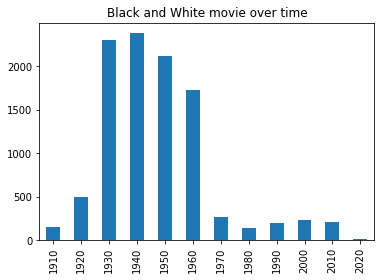

In [ ]:
color_black = color[color['color_info'] == 'Black and White']
color_black = color_black[pd.to_numeric(color_black['year'], errors='coerce').notnull()]
color_black['year'] = color_black['year'].astype(int)
color_black['year'] = color_black.year.apply(lambda s: s//10*10)
color_black = color_black[color_black['year'] >= 1910]
color_black['year'].value_counts().sort_index().plot(kind='bar', title='Black and White movie over time')

<AxesSubplot:title={'center':'Color movie over time'}>

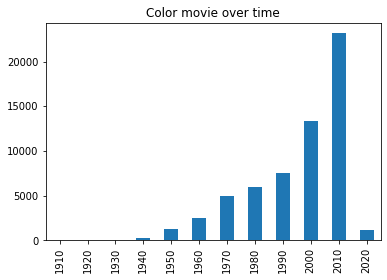

In [ ]:
color_color = color[color['color_info'] == 'Color']
color_color = color_color[pd.to_numeric(color_color['year'], errors='coerce').notnull()]
color_color['year'] = color_color['year'].astype(int)
color_color['year'] = color_color.year.apply(lambda s: s//10*10)
# color_black['year']
color_color['year'].value_counts().sort_index().plot(kind='bar', title='Color movie over time')

In [ ]:
# color_black['year'].value_counts().sort_index()
# color_black
black = color_black['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Black_Count')
color = color_color['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Color_Count')
color['Black_Count'] = black['Black_Count']
color.set_index('year', inplace=True)

color

,Color_Count,Black_Count
year,,
1910,4,152
1920,18,501
1930,57,2302
1940,260,2379
1950,1331,2124
1960,2542,1724
1970,5020,264
1980,5983,148
1990,7527,195


<AxesSubplot:xlabel='year'>

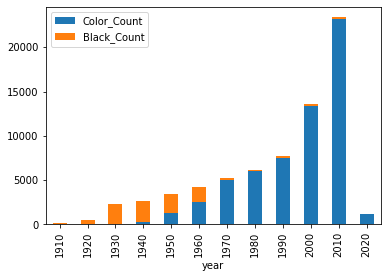

In [ ]:
color.plot.bar(stacked=True)

Kiểm tra âm thanh qua các năm

In [ ]:
def change(s):
    if s == 'DTS':
        s = 'Others'
    return s
df['sound_mix'] = df.sound_mix.apply(change)

<AxesSubplot:ylabel='sound_mix'>

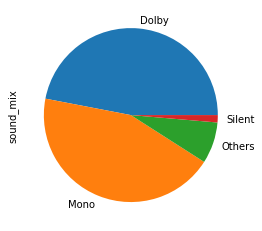

In [ ]:
df.sound_mix.value_counts().plot(kind='pie')

Có thể thấy rating của phim không tiếng cao hơn

<AxesSubplot:xlabel='sound_mix'>

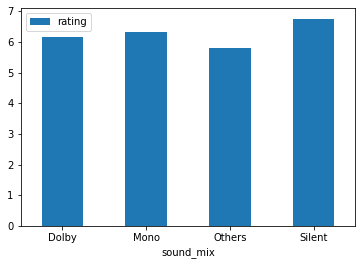

In [ ]:
rating_sound = df[['rating', 'sound_mix']]
mean_sound = rating_sound.groupby(['sound_mix']).mean().reset_index()
mean_sound.plot.bar(x='sound_mix',y='rating',rot=0)

In [ ]:
sound = df[['year', 'sound_mix']]

<AxesSubplot:title={'center':'Silent movie'}>

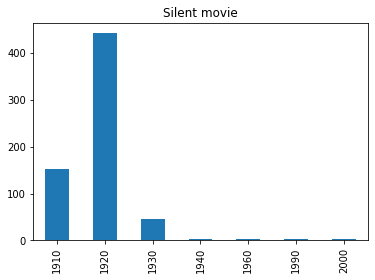

In [ ]:
sound_silent = sound[sound['sound_mix'] == 'Silent']
sound_silent = sound_silent[pd.to_numeric(sound_silent['year'], errors='coerce').notnull()]
sound_silent['year'] = sound_silent['year'].astype(int)
sound_silent['year'] = sound_silent.year.apply(lambda s: s//10*10)
sound_silent = sound_silent[sound_silent['year'] >= 1910]
sound_silent['year'].value_counts().sort_index().plot(kind='bar', title='Silent movie')

<AxesSubplot:title={'center':'Mono movie'}>

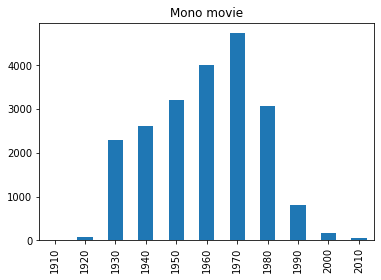

In [ ]:
sound_mono = sound[sound['sound_mix'] == 'Mono']
sound_mono = sound_mono[pd.to_numeric(sound_mono['year'], errors='coerce').notnull()]
sound_mono['year'] = sound_mono['year'].astype(int)
sound_mono['year'] = sound_mono.year.apply(lambda s: s//10*10)
sound_mono = sound_mono[sound_mono['year'] >= 1910]
sound_mono['year'].value_counts().sort_index().plot(kind='bar', title='Mono movie')

<AxesSubplot:title={'center':'Dolby movie'}>

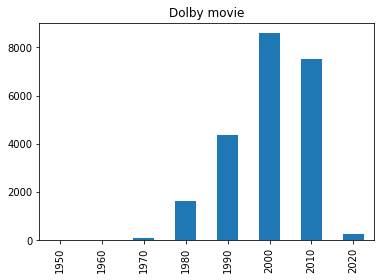

In [ ]:
SOUND_dolby = sound[sound['sound_mix'] == 'Dolby']
SOUND_dolby = SOUND_dolby[pd.to_numeric(SOUND_dolby['year'], errors='coerce').notnull()]
SOUND_dolby['year'] = SOUND_dolby['year'].astype(int)
SOUND_dolby['year'] = SOUND_dolby.year.apply(lambda s: s//10*10)
SOUND_dolby = SOUND_dolby[SOUND_dolby['year'] >= 1910]
SOUND_dolby['year'].value_counts().sort_index().plot(kind='bar',title='Dolby movie')

In [ ]:
silent = sound_silent['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Silent')
mono = sound_mono['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Mono')
dolby = SOUND_dolby['year'].value_counts().sort_index().rename_axis('year').reset_index(name='Dolby')

silent.set_index('year', inplace=True)
mono.set_index('year', inplace=True)
dolby.set_index('year', inplace=True)

sound_all = mono
sound_all = sound_all.join(silent)
sound_all = sound_all.join(dolby)
sound_all

,Mono,Silent,Dolby
year,,,
1910,3,153.0,NaN
1920,77,442.0,NaN
1930,2297,45.0,NaN
1940,2624,2.0,NaN
1950,3211,NaN,5.0
1960,4008,2.0,7.0
1970,4730,NaN,92.0
1980,3062,NaN,1620.0
1990,803,2.0,4369.0


Nhận xét xu hướng phim bắt đầu có tiếng vào thập kỉ 1930, và từ mono thành dolby bắt đầu từ thập kỉ 1980 (dobly sound bắt đầu từ 1976)

<AxesSubplot:xlabel='year'>

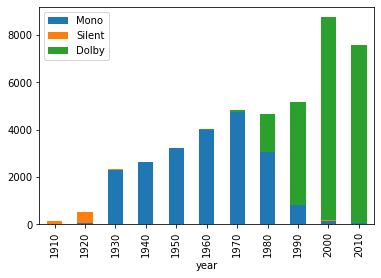

In [ ]:
sound_all.plot.bar(stacked=True)